## Cervical Cancer Behavior Risk

### Link
https://archive.ics.uci.edu/ml/datasets/Cervical+Cancer+Behavior+Risk
https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv

# Importando Módulos

In [182]:
#!pip install xgboost
import os
import kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

# Análise Exploratória

In [183]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00537/sobar-72.csv",sep=',')

df.head(150)

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [184]:
# Verificando valores nulos
df.isnull().sum().sort_values(ascending=False)

behavior_sexualRisk           0
behavior_eating               0
empowerment_desires           0
empowerment_abilities         0
empowerment_knowledge         0
socialSupport_instrumental    0
socialSupport_appreciation    0
socialSupport_emotionality    0
motivation_willingness        0
motivation_strength           0
perception_severity           0
perception_vulnerability      0
norm_fulfillment              0
norm_significantPerson        0
attitude_spontaneity          0
attitude_consistency          0
intention_commitment          0
intention_aggregation         0
behavior_personalHygine       0
ca_cervix                     0
dtype: int64

In [185]:
# Variáveis numéricas.
df.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [186]:
# Info dados.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [187]:
# para simplificar  e visualizar, pegando apenas as primeiras duas características...
X = df.iloc[:, :18]
y = df.iloc[:, 19]

In [188]:
n_components = 7
print( "Extraindo %d componentes das %d amostras" % (n_components, len(y)) )

pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(X)

X = pca.transform(X)
print('Mantida %5.2f%% da informação do conjunto inicial de dados'%(sum(pca.explained_variance_ratio_)*100))

Extraindo 7 componentes das 72 amostras
Mantida 86.81% da informação do conjunto inicial de dados


In [189]:
np.arange(6).reshape((3, 2))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [190]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ['darkorange',  'darkblue']

target_names = pd.array(['negativo', 'positivo'], dtype=str)

n_neighbors = 10

clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
#print(type(xx))
#print(xx.ravel().shape)
#print(yy.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()])
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
##Z = Z.reshape(xx.shape)
##plt.figure(figsize=(8, 6))
##plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
##sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=target_names[y],
##                palette=cmap_bold, alpha=1.0, edgecolor="black")
##plt.xlim(xx.min(), xx.max())
##plt.ylim(yy.min(), yy.max())
##plt.title("3-Class classification (k = %i, weights = '%s')"
##            % (n_neighbors, 'distance'))
#plt.xlabel(iris.feature_names[0])
#plt.ylabel(iris.feature_names[1])

##plt.show()

[[-2.63198212 -2.32060957]
 [-2.61198212 -2.32060957]
 [-2.59198212 -2.32060957]
 ...
 [ 2.78801788  2.61939043]
 [ 2.80801788  2.61939043]
 [ 2.82801788  2.61939043]]


ValueError: query data dimension must match training data dimension

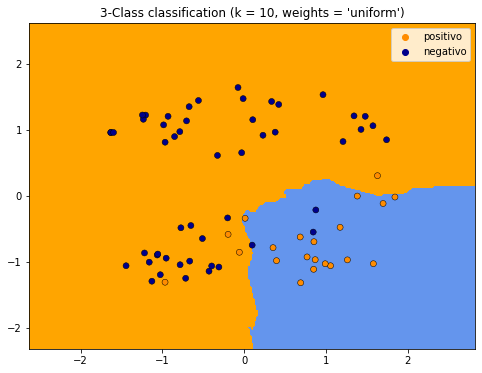

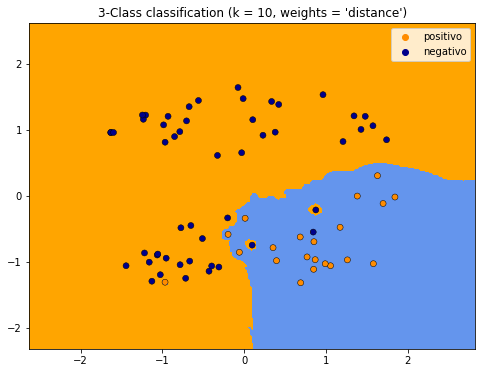

In [ ]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ['darkorange',  'darkblue']

target_names = pd.array(['negativo', 'positivo'], dtype=str)

n_neighbors = 10
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    #plt.xlabel(iris.feature_names[0])
    #plt.ylabel(iris.feature_names[1])

plt.show()

# Dados de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
train = pd.concat([X_train,y_train],axis=1)

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

# Visualização dos Dados

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

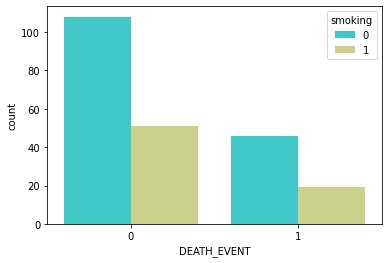

In [ ]:
sns.countplot(x='DEATH_EVENT', hue='smoking', data=train, palette='rainbow')

Text(0.5, 1.0, 'Distribuição da idade')

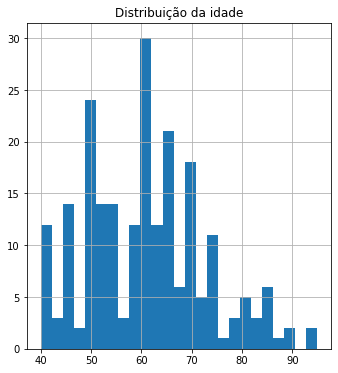

In [ ]:
# Distribuição das idades.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = train.age.hist(bins=25)
fig.set_title('Distribuição da idade')

Text(0.5, 1.0, 'Distribuição do valor da Sodium')

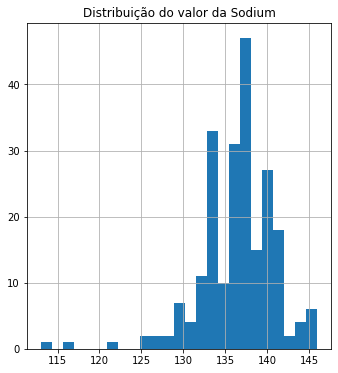

In [ ]:
# Distribuição dos valores de Sodium.
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
fig = train.serum_sodium.hist(bins=25)
fig.set_title('Distribuição do valor da Sodium')

<AxesSubplot:>

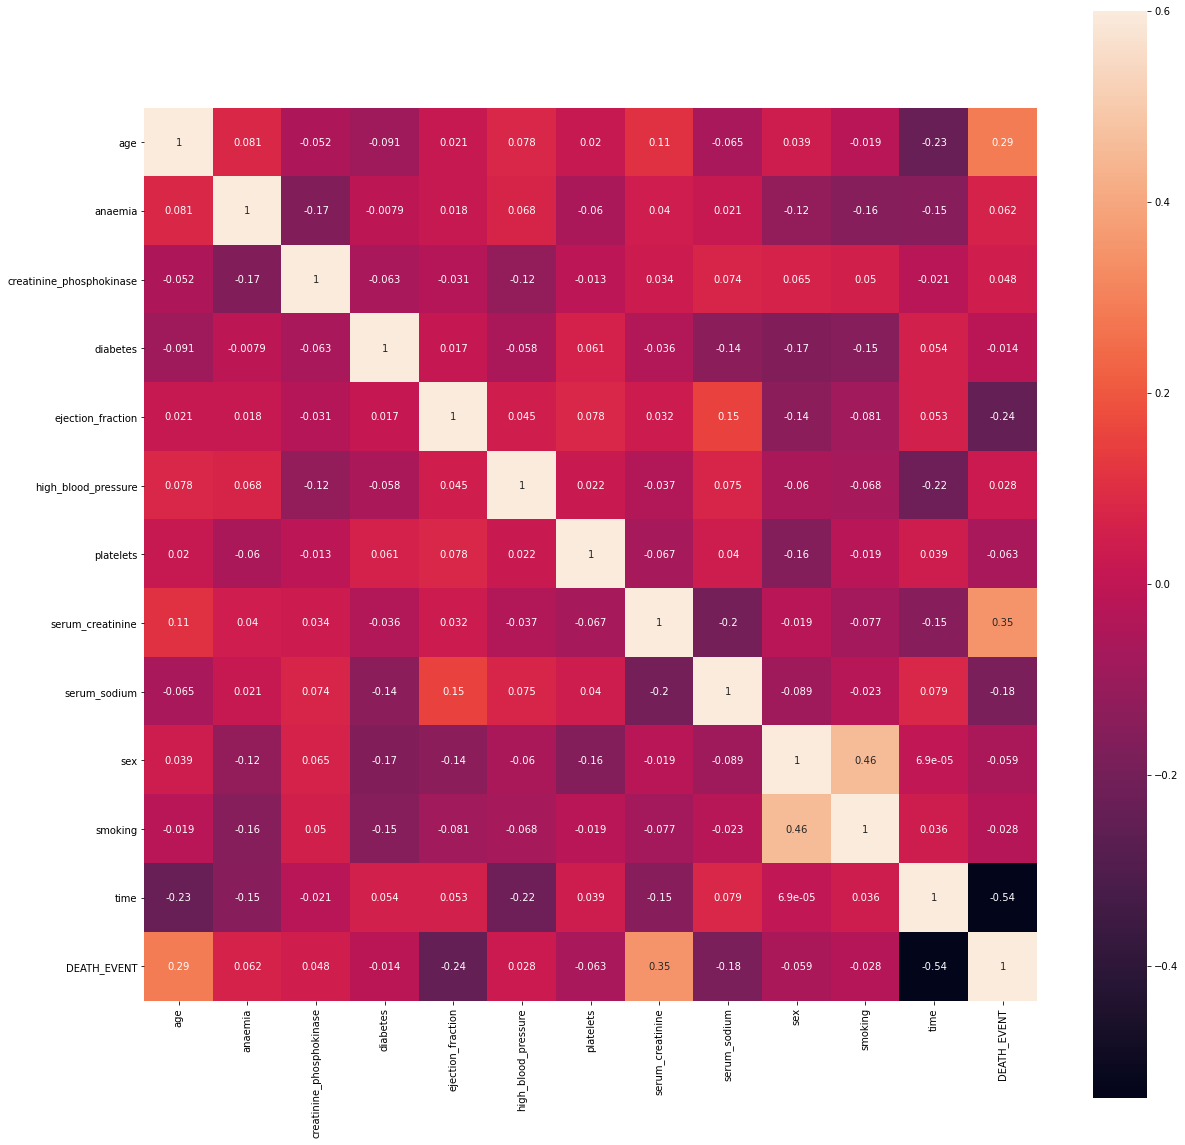

In [ ]:
# Matriz de correlação.
# Possibilita a análise simultânea da associação entre variáveis.
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), vmax=0.6, square=True, annot=True)

# Tratamento dos Dados ausentes

# Modelos Preditivos

In [ ]:
# Extração de variáveis com testes estatísticos univariados (Teste qui-quadrado)
f_score = chi2(X_train, y_train)
f_score

(array([4.27980335e+01, 4.99532333e-01, 8.13995363e+02, 2.55947498e-02,
        4.67702188e+01, 1.16154963e-01, 3.14430160e+04, 1.93955233e+01,
        1.09943174e+00, 2.92615124e-01, 1.19477504e-01, 2.98938826e+03]),
 array([6.06931421e-011, 4.79705683e-001, 4.88933607e-179, 8.72893999e-001,
        7.98171842e-012, 7.33242749e-001, 0.00000000e+000, 1.06255845e-005,
        2.94390848e-001, 5.88549551e-001, 7.29601871e-001, 0.00000000e+000]))

In [ ]:
# Listando o P-values por variável
p_values = pd.Series(f_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending = False)

diabetes                     8.728940e-01
high_blood_pressure          7.332427e-01
smoking                      7.296019e-01
sex                          5.885496e-01
anaemia                      4.797057e-01
serum_sodium                 2.943908e-01
serum_creatinine             1.062558e-05
age                          6.069314e-11
ejection_fraction            7.981718e-12
creatinine_phosphokinase    4.889336e-179
platelets                    0.000000e+00
time                         0.000000e+00
dtype: float64

In [ ]:
### Naive Bayes ###

# Abordagem probabilística (Teorema de Bayes)
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)
prev_gaussian = gaussian.predict(X_test)
result_train = gaussian.score(X_train, y_train)
result_val = cross_val_score(gaussian,train.drop('DEATH_EVENT',axis=1), train['DEATH_EVENT'], cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 0.8303571428571429, while validation score = 0.816868686868687


In [ ]:
### Decision Tree ###

decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=7)
decision_tree.fit(X_train,y_train)
prev_tree = decision_tree.predict(X_test)
result_train = decision_tree.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 1.0, while validation score = 0.8035353535353537


In [ ]:
### KNN ###

knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn.fit(X_train,y_train)
prev_knn = knn.predict(X_test)
result_train = knn.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

taring score = 0.7544642857142857, while validation score = 0.8035353535353537


In [ ]:
### Support vector machines (SVM) ###

svc = SVC(kernel = 'rbf', random_state = 7, C = 10.0, gamma='auto')
svc.fit(X_train,y_train)
previsoes = svc.predict(X_test)
result_train = svc.score(X_train, y_train)
result_val = cross_val_score(decision_tree,X_train, y_train, cv=5).mean()
print(f'training score = {result_train}, while validation score = {result_val}')

training score = 1.0, while validation score = 0.8035353535353537
